<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/clustering/Latihan_Clustering_Mall_Customers_dan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

In [3]:
datas = pd.read_csv("/content/Mall_Customers.csv")
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
datas.shape

(200, 5)

# Gender

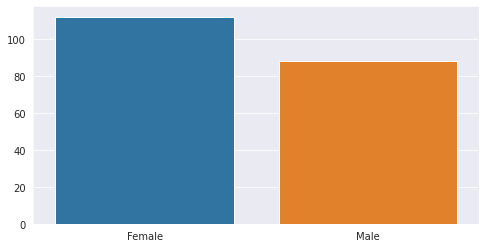

In [83]:
genders = datas.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# Age

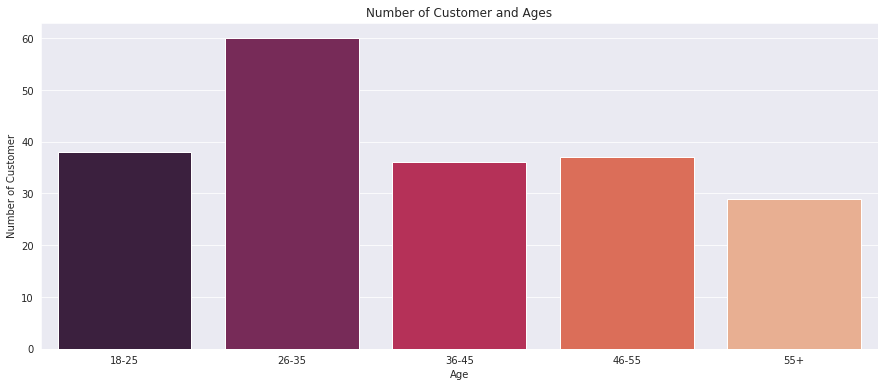

In [84]:
age18_25 = datas.Age[(datas.Age <= 25) & (datas.Age >= 18)]
age26_35 = datas.Age[(datas.Age <= 35) & (datas.Age >= 26)]
age36_45 = datas.Age[(datas.Age <= 45) & (datas.Age >= 36)]
age46_55 = datas.Age[(datas.Age <= 55) & (datas.Age >= 46)]
age55above = datas.Age[datas.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# Annual Income

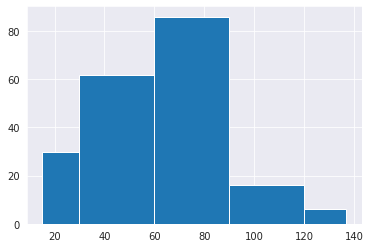

In [85]:
plt.hist(datas['Annual Income (k$)'], bins=[datas['Annual Income (k$)'].min(), 30, 60, 90, 120, datas['Annual Income (k$)'].max()]);

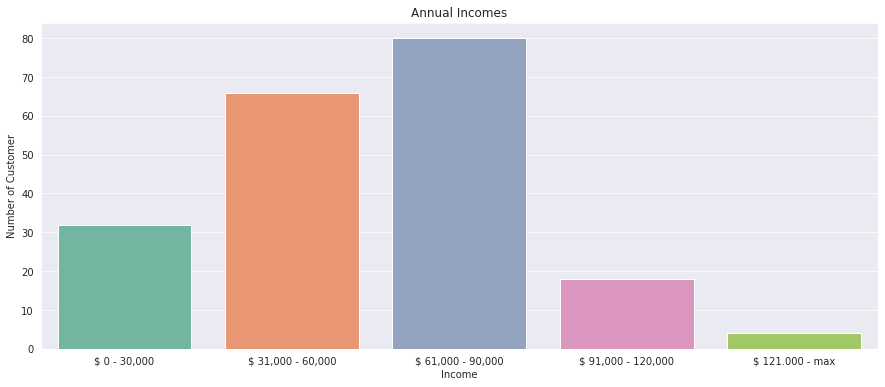

In [63]:
income = datas['Annual Income (k$)']
income0_30 = income[(income <= 30) & (income >= 0)]
income31_60 = income[(income <= 60) & (income >= 31)]
income61_90 = income[(income <= 90) & (income >= 61)]
income91_120 = income[(income <= 120) & (income >= 91)]
income121_max = income[(income <= income.max()) & (income >= 121)]

x = ['$ 0 - 30,000', '$ 31,000 - 60,000', '$ 61,000 - 90,000', '$ 91,000 - 120,000', '$ 121.000 - max']
y = [len(income0_30.values), len(income31_60.values), len(income61_90.values), len(income91_120.values), len(income121_max)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette='Set2')
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show();

# Spending Scores

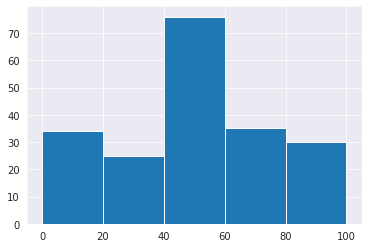

In [66]:
plt.hist(datas['Spending Score (1-100)'], bins=[0, 20, 40, 60, 80, 100]);

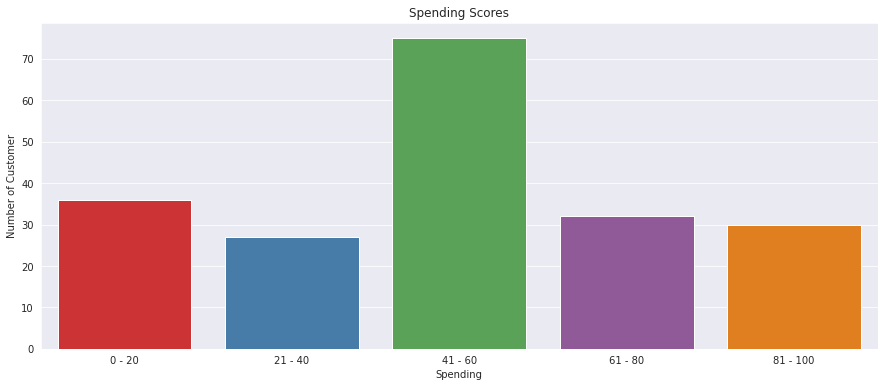

In [80]:
spending = datas['Spending Score (1-100)']
spending0_20 = spending[(spending <= 20) & (spending >= 0)]
spending21_40 = spending[(spending <= 40) & (spending >= 21)]
spending41_60 = spending[(spending <= 60) & (spending >= 41)]
spending61_80 = spending[(spending <= 80) & (spending >= 61)]
spending81_100 = spending[(spending <= 100) & (spending >= 81)]

x = ['0 - 20', '21 - 40', '41 - 60', '61 - 80', '81 - 100']
y = [len(spending0_20.values), len(spending21_40.values), len(spending41_60.values), len(spending61_80.values), len(spending81_100.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette='Set1')
plt.title("Spending Scores")
plt.xlabel("Spending")
plt.ylabel("Number of Customer")
plt.show();

# Analisis Elbow -> Training

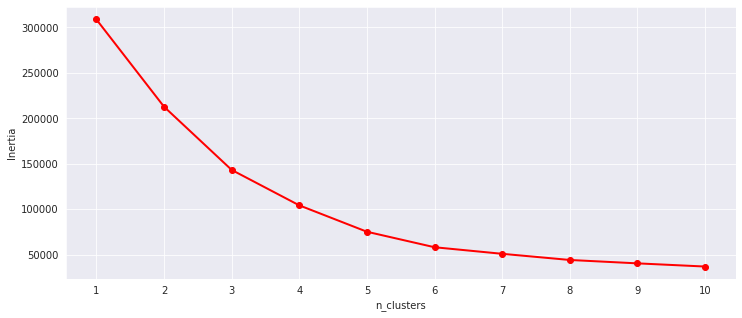

In [116]:
X = datas[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

score = []
for k in range(1, 11):
  model = KMeans(n_clusters=k, init='k-means++', n_init=50, random_state=42)
  member = model.fit_predict(X)
  score.append(model.inertia_)

plt.figure(figsize=(12, 5))
plt.plot(range(1,11), score, linewidth=2, color="red", marker="o")
plt.xticks(range(1,11))
plt.xlabel("n_clusters")
plt.ylabel("Inertia")
plt.show();

## Training Menggunakan n_cluster

In [126]:
model = KMeans(n_clusters=5, init='k-means++', n_init=50, random_state=42)
cluster = model.fit_predict(X)
center = model.cluster_centers_

In [133]:
df = datas.copy()
df['label'] = cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [135]:
df.label.value_counts()

1    79
3    39
0    36
4    23
2    23
Name: label, dtype: int64

In [144]:
#Untuk ngetes centroid itu sama gak dengan mean, ternyata sama
tes = df[df.label == 3]
tes['Annual Income (k$)'].mean(), tes['Spending Score (1-100)'].mean()

(86.53846153846153, 82.12820512820512)

In [136]:
analisis = pd.DataFrame(center, columns=X.columns)
analisis.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,40.666667,87.750000,17.583333
1,43.088608,55.291139,49.569620
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


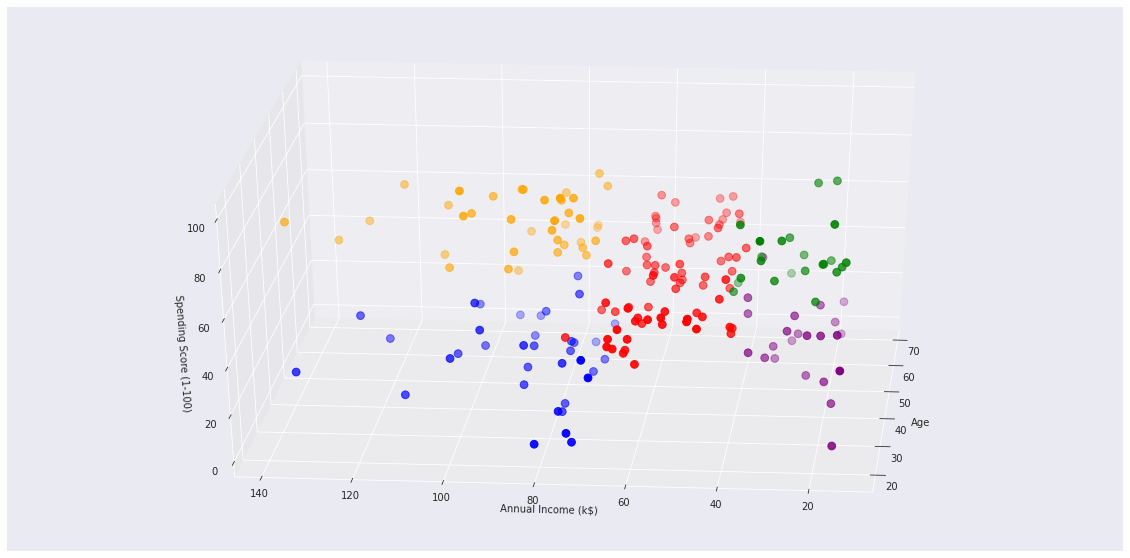

In [146]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [138]:
# https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3